# Visualisation d’un nuage de points et exploration des variables

#### Importez les librairies qu’il nous faut (pandas, seaborn, matplotlib, numpy) 

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df = pd.read_csv('../Python/data/house_pricing.csv') 

#### Donnez la liste des variables présentes dans ce dataset ainsi que leur nature (sont elles qualitatives, quantitatives, discrète etc...) et leur type (float, int, str etc...)

In [27]:
for i in df : 
    print(i +": "+ str(df[i].dtypes))   
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [31]:
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


#### En créant un nuage de points, regardez comment se comporte la colonne LotArea par rapport au SalesPrices

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

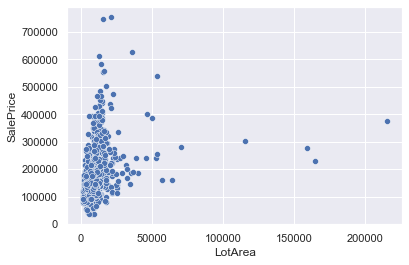

In [33]:
sns.set_theme()
sns.scatterplot(data=df, x="LotArea", y="SalePrice")

#### Affinez votre visualisation en ne gardant uniquement les maisons qui ont un LotAreainférieur à 20 000 pieds carrés et un prix inférieur à 500 000$

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

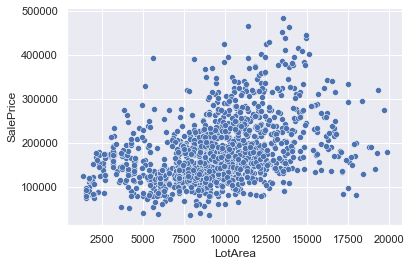

In [34]:
toto = df[df["LotArea"] < 20000]
toto = toto[toto["SalePrice"] < 500000]
# toto = df[(df['LotArea']<20000)&(df['SalePrice']<500000)] 
sns.scatterplot(data=toto, x="LotArea", y="SalePrice")

#### En créant un nuage de points, regardez la relation entre le LotFrontage et le LotArea

<AxesSubplot:xlabel='LotFrontage', ylabel='LotArea'>

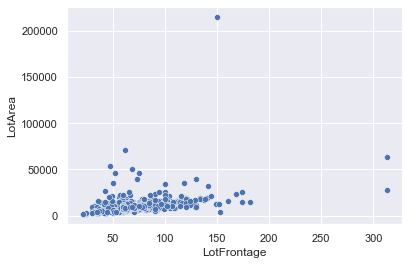

In [37]:
sns.scatterplot(data=df, x="LotFrontage", y="LotArea")

#### De la même manière, affinez votre visualisation en ne gardant uniquement les maisons qui ont un LotFrontage inférieur à 200 pieds carrés et un LotArea inférieur à 100000 pieds carré

<AxesSubplot:xlabel='LotFrontage', ylabel='LotArea'>

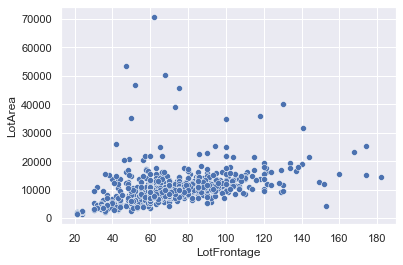

In [38]:
toto = df[(df['LotFrontage']<200)&(df['LotArea']<100000)]
sns.scatterplot(data= toto, x="LotFrontage", y="LotArea") 

# Visualisation de relations continues

#### Importez les librairies qu’il vous faut  

In [42]:
df = pd.read_csv('../Python/data/sales_predictions.csv');
list(df)

['date', 'date_block_num', 'shop_id', 'item_id', 'item_price', 'item_cnt_day']

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


#### En utilisant relplot(), construisez un graphique qui va vous permettre de voir l’évolution des prix par rapport au temps. Que pouvez vous voir ?  

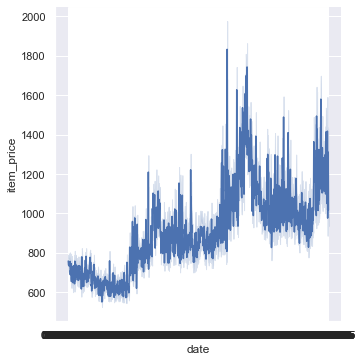

In [44]:
sns.relplot(x = 'date', y = 'item_price', kind = 'line', data = df)

#### Corrigeons le problème de visualisation, en utilisant la fonction .sample() de Pandas, prenez un échantillons de 50 éléments dans votre dataset 

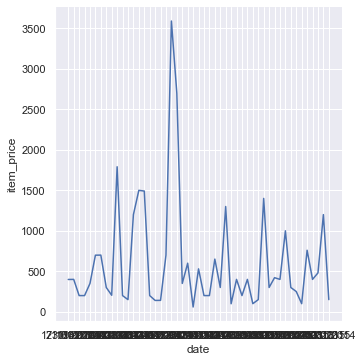

In [45]:
sns.relplot( data = df.sample(50), x="date", y="item_price", kind = 'line')

#### Retentez de faire votre visualisation, créez une figure de taille (20,6). Que voyez vous ? 

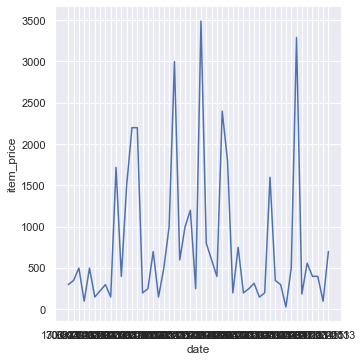

In [46]:
sns.relplot(sizes=(20, 6), data= df.sample(50), x="date", y="item_price", kind = 'line')

#### En utilisant la fonction pd.to_datetime(), convertissez votre colonne date en datetime

In [51]:
date = pd.to_datetime(df.date)
date

0         2013-02-01
1         2013-03-01
2         2013-05-01
3         2013-06-01
4         2013-01-15
             ...    
2935844   2015-10-10
2935845   2015-09-10
2935846   2015-10-14
2935847   2015-10-22
2935848   2015-03-10
Name: date, Length: 2935849, dtype: datetime64[ns]

#### Retentez une dernière fois votre visualisation.  

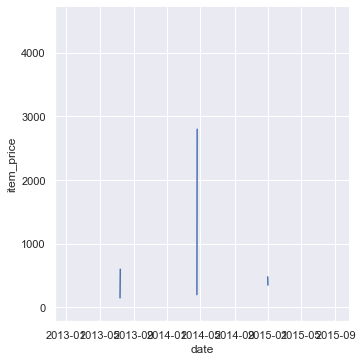

In [52]:
sns.relplot(sizes=(20, 6), data= df.sample(50), x=date, y="item_price", kind = 'line')